# **Prueba BI Lead**

## **Contexto**

#### Eres el líder BI en la empresa ABC, una compañía de GAMBLING en COLOMBIA. responsable de analizar datos para optimizar estrategias comerciales y operativas y los recursos relacionados con datos, recuerda hacer propuestas de valor para el negocio basado en los datos. 

## **Objetivo de la prueba**

#### Evaluar tu capacidad para manejar datos, crear visualizaciones efectivas y automatizar procesos utilizando herramientas clave como SQL, Python y Power BI, además de demostrar habilidades en la documentación y gestión de proyectos con Notion.

## **1. Gestión de Datos y Análisis**

#### Análisis exploratorio de Datos con SQL, limpieza y transformacion en Python

- Tareas: 
    - Carga los datos del archivo "assetment-bookmaker_(3).xlsx" a SQL y realice un análisis exploratorio de datos para identificar valores faltantes y estadísticas básicas de las variables. 
    - Utiliza SQL para explorar los datos relevantes de la base de datos.
    - Realiza un análisis exploratorio de datos.
    - Limpieza y transformación con Python.

In [1]:
# Importamos las librerías necesarias para el análisis y proyección
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [2]:
# Cargar datos desde Excel
df = pd.read_excel('assetment-bookmaker.xlsx', sheet_name="in", header=None)

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,0
0,"Periodo,# Clicks,# Registros IN,# Primer depÃ³..."
1,"2022-08-04,3.0,,,,,,"
2,"2022-08-08,1.0,,,,,,"
3,"2022-08-09,1.0,,,,,,"
4,"2022-11-03,,0.0,0.0,194.5249,1.0,194.5249,160...."


## **Nota**

#### El archivo Excel no está estructurado como una hoja de cálculo normal, sino que probablemente contiene datos separados por comas dentro de una sola columna, como si fuera un archivo .csv embebido dentro de una celda Excel.

## **Solución**

## Separar esa única columna en múltiples columnas con **.str.split()**

In [4]:
# Separamos la unica columna a partir del Separador ','
df_split = df[0].str.split(",", expand=True)

# Tomar la primera fila como encabezado
df_split.columns = df_split.iloc[0]  # Asigna los encabezados
df_split = df_split.drop(index=0)    # Elimina la fila usada como encabezado

# Reiniciar índice
df_split.reset_index(drop=True, inplace=True)

print("Primeras 15 filas del dataset:")
df_split.head(15)

Primeras 15 filas del dataset:


,Periodo,# Clicks,# Registros IN,# Primer depÃ³sito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
0,2022-08-04,3.0,,,,,,
1,2022-08-08,1.0,,,,,,
2,2022-08-09,1.0,,,,,,
3,2022-11-03,,0.0,0.0,194.5249,1.0,194.5249,160.4830425
4,2022-11-04,,0.0,0.0,0.0,1.0,44.17412175,6.67520062
5,2022-11-05,,0.0,0.0,0.0,1.0,27.94059948,-38.2647512767777
6,2022-11-06,,0.0,0.0,0.0,1.0,66.0878811946329,66.0878811946329
7,2022-11-08,,0.0,0.0,97.72458,1.0,368.705058338217,78.179664
8,2022-11-09,,0.0,0.0,0.0,1.0,50.9031416,-66.3626207775815
9,2022-11-10,,0.0,0.0,0.0,1.0,83.70114048,31.9691856


In [5]:
# Obtener información sobre las columnas y tipos de datos
print("\n Información general del dataset:")
df_split.info()


 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Periodo                      447 non-null    object
 1   # Clicks                     447 non-null    object
 2   # Registros IN               447 non-null    object
 3   # Primer depÃ³sito IN        447 non-null    object
 4   Total depositado IN          447 non-null    object
 5   # Personas que apostaron IN  447 non-null    object
 6   Total apostado               447 non-null    object
 7   Net revenue IN               447 non-null    object
dtypes: object(8)
memory usage: 28.1+ KB


In [6]:
# Convertir tipos de datos
# Convertir 'Periodo' a tipo fecha
df_split['Periodo'] = pd.to_datetime(df_split['Periodo'], errors="coerce")

# Convertir columnas numéricas
cols_numericas = df_split.columns[1:]
df_split[cols_numericas] = df_split[cols_numericas].apply(pd.to_numeric, errors="coerce")

# Verificamos el cambio de tipo de datos
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Periodo                      447 non-null    datetime64[ns]
 1   # Clicks                     269 non-null    float64       
 2   # Registros IN               424 non-null    float64       
 3   # Primer depÃ³sito IN        424 non-null    float64       
 4   Total depositado IN          404 non-null    float64       
 5   # Personas que apostaron IN  404 non-null    float64       
 6   Total apostado               404 non-null    float64       
 7   Net revenue IN               404 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 28.1 KB


#### **Conexion "df_split" a SQL para desarrollar Analisis Exploratorio (EDA)**

In [7]:
import urllib
# Guardar como CSV limpio
df_split.to_csv("assetment_bookmaker_clean.csv", index=False, encoding='utf-8')

# Definir parámetros de conexión
server = r"DESKTOP-3U6C2J3\SQLEXPRESS"  # Tu servidor local
database = "Casino_DB"                # ✅ Asegúrate de que esta base de datos ya exista en SSMS
nombre_tabla = "assetment_bookmaker_clean"  # Este será el nombre de la tabla

# Cadena de conexión con autenticación de Windows
params = urllib.parse.quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
)

# 4. Crear el engine SQLAlchemy
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# 5. Probar la conexión y cargar la tabla
with engine.connect() as conn:
    print("✅ Conexión exitosa a SQL Server.")
    df_split.to_sql(nombre_tabla, conn, if_exists='replace', index=False, schema='dbo')
    print(f"✅ Tabla '{nombre_tabla}' cargada exitosamente en la base de datos '{database}'.")


✅ Conexión exitosa a SQL Server.
✅ Tabla 'assetment_bookmaker_clean' cargada exitosamente en la base de datos 'Casino_DB'.


In [8]:
# Verificamos el nombre de las columnas
df_split.columns

Index(['Periodo', '# Clicks', '# Registros IN', '# Primer depÃ³sito IN',
       'Total depositado IN', '# Personas que apostaron IN', 'Total apostado',
       'Net revenue IN'],
      dtype='object', name=0)

In [9]:
# Corregir nombres de columnas
df_split.columns = [str(col).strip().replace('Ã³', 'ó') for col in df_split.columns]

# Estandarización de nombres de columnas
df_split.columns = df_split.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Verificamos el nombre de la columna Primer depósito
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   periodo                      447 non-null    datetime64[ns]
 1   #_clicks                     269 non-null    float64       
 2   #_registros_in               424 non-null    float64       
 3   #_primer_depósito_in         424 non-null    float64       
 4   total_depositado_in          404 non-null    float64       
 5   #_personas_que_apostaron_in  404 non-null    float64       
 6   total_apostado               404 non-null    float64       
 7   net_revenue_in               404 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 28.1 KB


In [10]:
# Verificar nulos nuevamente
df_split.isnull().sum()

periodo                          0
#_clicks                       178
#_registros_in                  23
#_primer_depósito_in            23
total_depositado_in             43
#_personas_que_apostaron_in     43
total_apostado                  43
net_revenue_in                  43
dtype: int64

In [11]:
# Reemplazo de valores nulos por 0
cols_to_fill = [
    '#_clicks',
    '#_registros_in',
    '#_primer_depósito_in',
    'total_depositado_in',
    '#_personas_que_apostaron_in',
    'total_apostado',
    'net_revenue_in'
]
df_split[cols_to_fill] = df_split[cols_to_fill].fillna(0)

# Verificar nulos nuevamente
print('Total Nulos')
print(df_split.isnull().sum())

# Verificamos si hay tipos de datos incorrectos
print()
print('Tipos de datos')
print(df_split.dtypes)

Total Nulos
periodo                        0
#_clicks                       0
#_registros_in                 0
#_primer_depósito_in           0
total_depositado_in            0
#_personas_que_apostaron_in    0
total_apostado                 0
net_revenue_in                 0
dtype: int64

Tipos de datos
periodo                        datetime64[ns]
#_clicks                              float64
#_registros_in                        float64
#_primer_depósito_in                  float64
total_depositado_in                   float64
#_personas_que_apostaron_in           float64
total_apostado                        float64
net_revenue_in                        float64
dtype: object


In [12]:
# Crear una columna de "Año-Mes" para facilitar agregaciones temporales
df_split['año_mes'] = df_split['periodo'].dt.to_period('M')  # nuevo campo para Power BI

# Verificamos que se haya creado la Columna 'año_mes'
df_split.head()

,periodo,#_clicks,#_registros_in,#_primer_depósito_in,total_depositado_in,#_personas_que_apostaron_in,total_apostado,net_revenue_in,año_mes
0,2022-08-04,3.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,2022-08
1,2022-08-08,1.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,2022-08
2,2022-08-09,1.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,2022-08
3,2022-11-03,0.0,0.0,0.0,194.5249,1.0,194.524900,160.483043,2022-11
4,2022-11-04,0.0,0.0,0.0,0.0000,1.0,44.174122,6.675201,2022-11


In [ ]:
# Creamos una lista de columnas para KPI'
cols_to_convert = ['#_clicks', '#_registros_in', '#_personas_que_apostaron_in', 
                   'total_depositado_in', 'net_revenue_in']

df_split[cols_to_convert].isna().sum()

# Limpieza y conversión a numérico
for col in cols_to_convert:
    # Elimina comas, espacios, y símbolos comunes
    df_split[col] = df_split[col].astype(str).str.replace(',', '').str.replace('$', '').str.strip()
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')  # convierte a número

for col in cols_to_convert:
    print(f"{col}: {df_split[col].apply(type).unique()}")

#_clicks: [<class 'float'>]
#_registros_in: [<class 'float'>]
#_personas_que_apostaron_in: [<class 'float'>]
total_depositado_in: [<class 'float'>]
net_revenue_in: [<class 'float'>]


In [14]:
# Crear campos derivados útiles para Power BI (KPIs transformados)
df_split['conversion_rate'] = np.where(df_split['#_clicks'] > 0, 
                                       df_split['#_registros_in'] / df_split['#_clicks'], 0)

df_split['avg_deposit_per_user'] = np.where(df_split['#_personas_que_apostaron_in'] > 0, 
                                            df_split['total_depositado_in'] / df_split['#_personas_que_apostaron_in'], 0)

df_split['revenue_per_deposit'] = np.where(df_split['total_depositado_in'] > 0, 
                                           df_split['net_revenue_in'] / df_split['total_depositado_in'], 0)

df_split[cols_to_convert].head()


,#_clicks,#_registros_in,#_personas_que_apostaron_in,total_depositado_in,net_revenue_in
0,3.0,0.0,0.0,0.0000,0.000000
1,1.0,0.0,0.0,0.0000,0.000000
2,1.0,0.0,0.0,0.0000,0.000000
3,0.0,0.0,1.0,194.5249,160.483043
4,0.0,0.0,1.0,0.0000,6.675201


In [15]:
df_split.columns

Index(['periodo', '#_clicks', '#_registros_in', '#_primer_depósito_in',
       'total_depositado_in', '#_personas_que_apostaron_in', 'total_apostado',
       'net_revenue_in', 'año_mes', 'conversion_rate', 'avg_deposit_per_user',
       'revenue_per_deposit'],
      dtype='object')

In [16]:
# Filtrar los datos con actividad 
df_actividad = df_split[
    (df_split['#_clicks'] > 0) &
    (df_split['#_primer_depósito_in'] > 0) &
    (df_split['total_depositado_in'] > 0) &
    (df_split['#_personas_que_apostaron_in'] > 0) &
    (df_split['total_apostado'] > 0) &
    (df_split['net_revenue_in'] > 0)
].reset_index(drop=True) 

# Guardamos dataset limpio y preparado para Power BI
df_actividad.to_csv("assetment_bookmaker_ready.csv", index=False)
df_actividad.head(15)


,periodo,#_clicks,#_registros_in,#_primer_depósito_in,total_depositado_in,#_personas_que_apostaron_in,total_apostado,net_revenue_in,año_mes,conversion_rate,avg_deposit_per_user,revenue_per_deposit
0,2022-11-25,9705.0,112.0,64.0,2093.406886,559.0,18538.051988,3308.869547,2022-11,0.011540,3.744914,1.580615
1,2022-11-27,7980.0,43.0,37.0,3343.945184,493.0,25492.039465,716.959308,2022-11,0.005388,6.782850,0.214405
2,2022-11-28,8217.0,30.0,42.0,5848.122926,598.0,34299.098726,7.527586,2022-11,0.003651,9.779470,0.001287
3,2022-11-30,6647.0,17.0,28.0,3008.933024,465.0,29197.093280,965.427480,2022-11,0.002558,6.470824,0.320854
4,2022-12-01,6103.0,20.0,24.0,2007.409539,422.0,27792.257545,4149.775367,2022-12,0.003277,4.756895,2.067229
5,2022-12-02,6758.0,41.0,33.0,6426.183158,510.0,33717.969304,1239.065467,2022-12,0.006067,12.600359,0.192815
6,2022-12-03,5270.0,18.0,22.0,4666.357108,381.0,19612.879284,1305.307930,2022-12,0.003416,12.247656,0.279727
7,2022-12-05,6511.0,8.0,20.0,5158.711728,498.0,28727.573870,2048.513217,2022-12,0.001229,10.358859,0.397098
8,2022-12-06,4758.0,5.0,8.0,2345.092439,392.0,19781.233198,3772.250507,2022-12,0.001051,5.982379,1.608572
9,2022-12-07,2789.0,3.0,10.0,1529.178199,166.0,16173.022243,616.097778,2022-12,0.001076,9.211917,0.402895


#### **Identificacion y manejo de Valores atipicos (Outliers)**

In [17]:
# Identificacion y manejo de valores atipicos

# Cargar librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set(style="whitegrid")

In [18]:
# Seleccionar columnas numéricas relevantes
columnas_numericas = [
    '#_clicks',
    '#_registros_in',
    '#_primer_depósito_in',
    'total_depositado_in',
    '#_personas_que_apostaron_in',
    'total_apostado',
    'net_revenue_in'
]

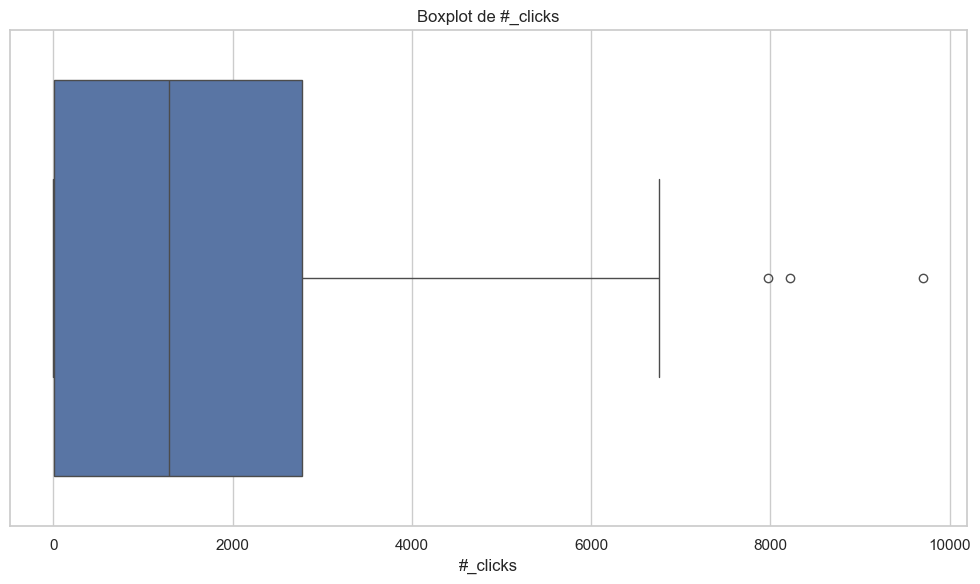

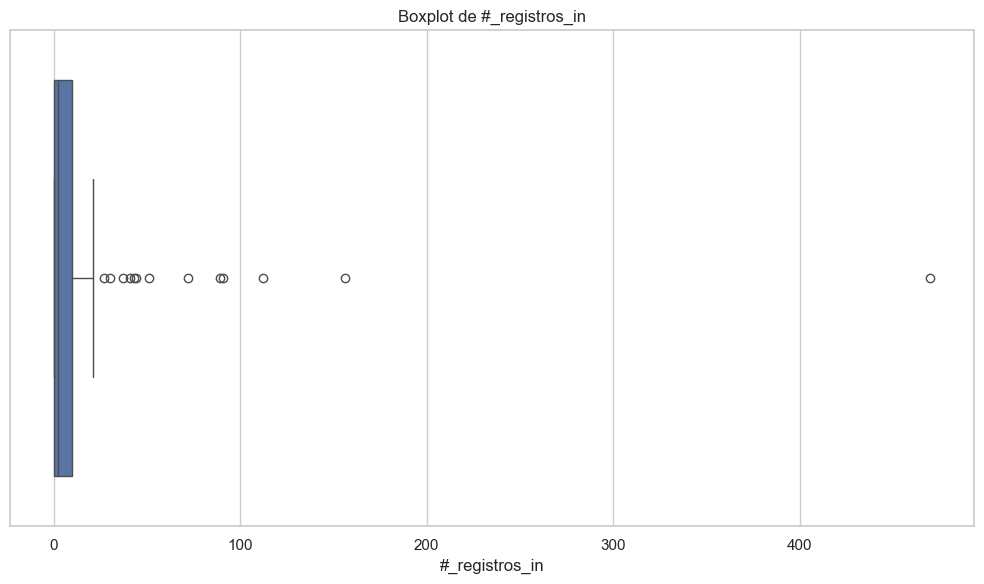

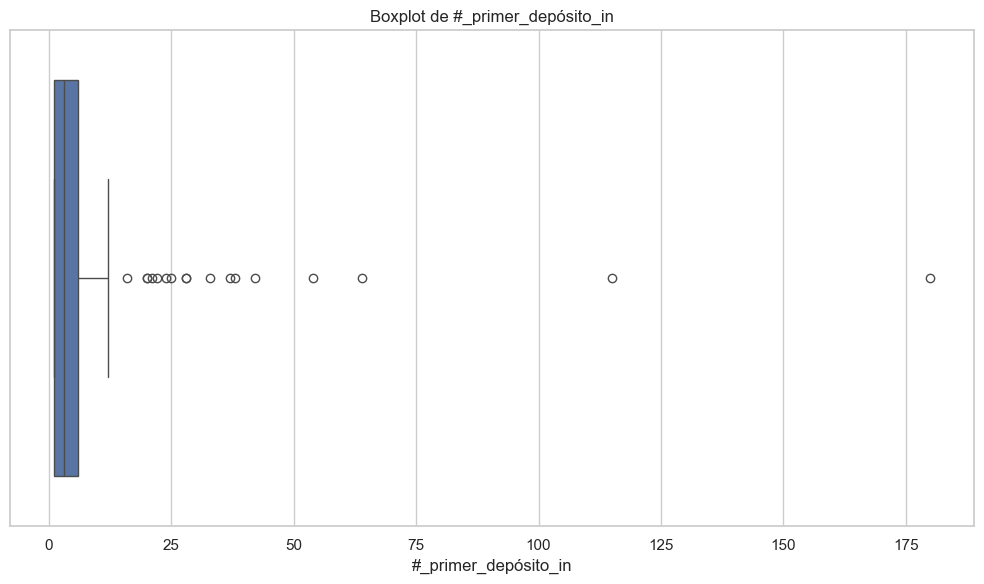

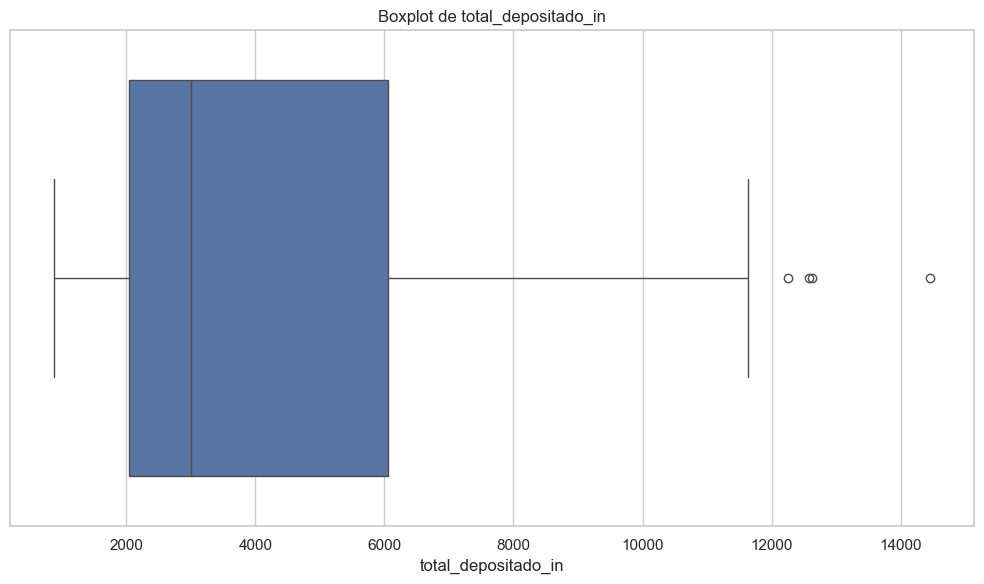

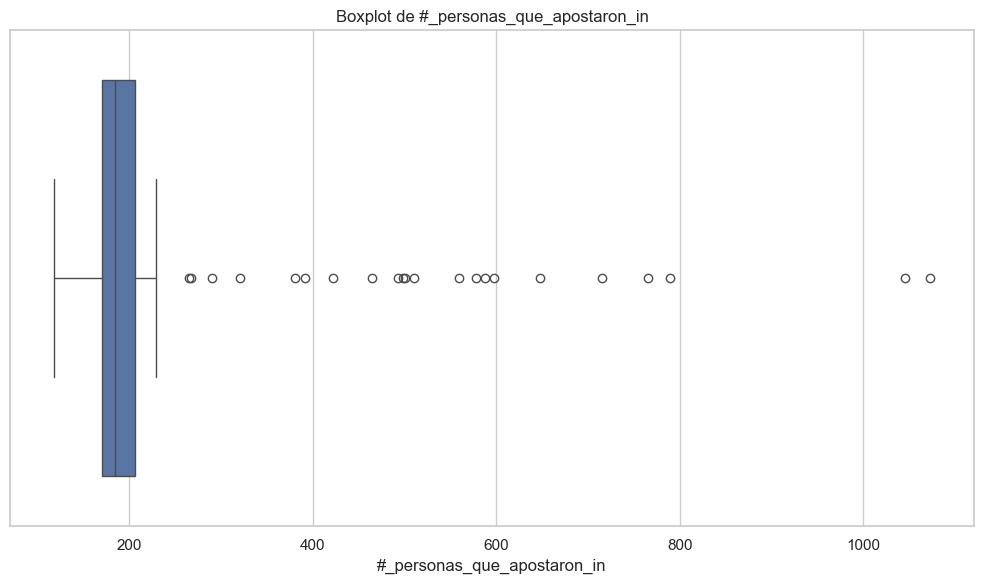

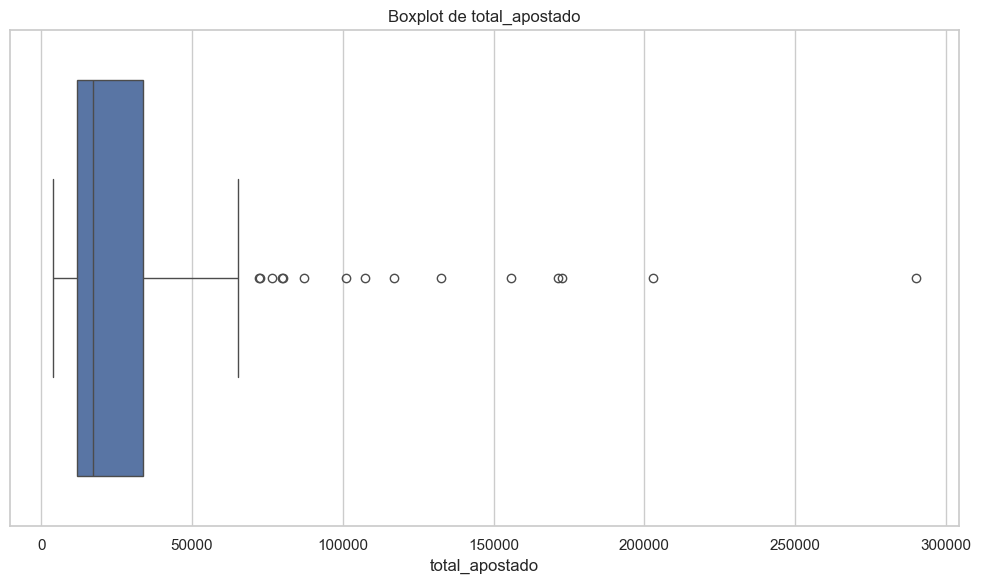

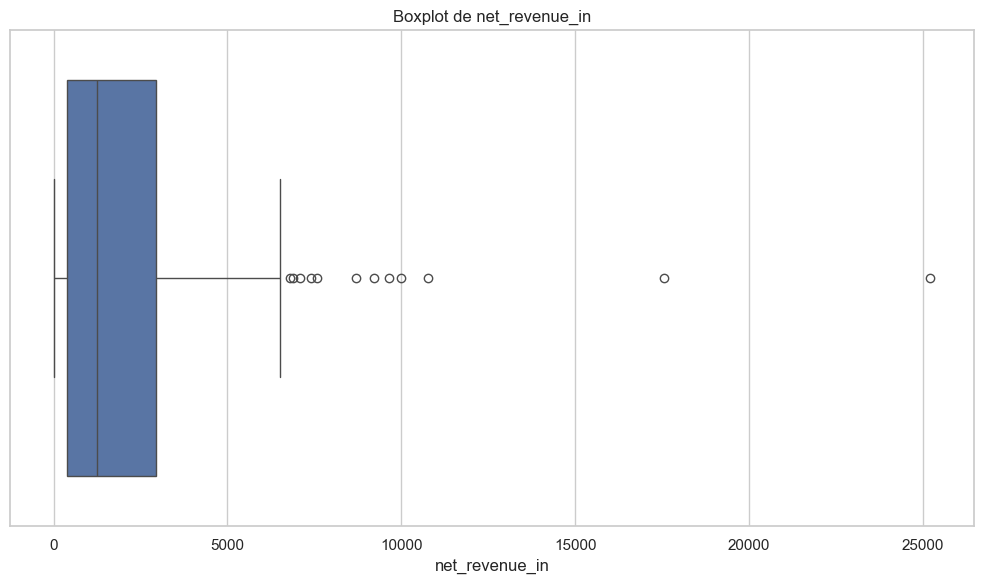

In [19]:
# Visualización de boxplots (para ver outliers)
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_actividad[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


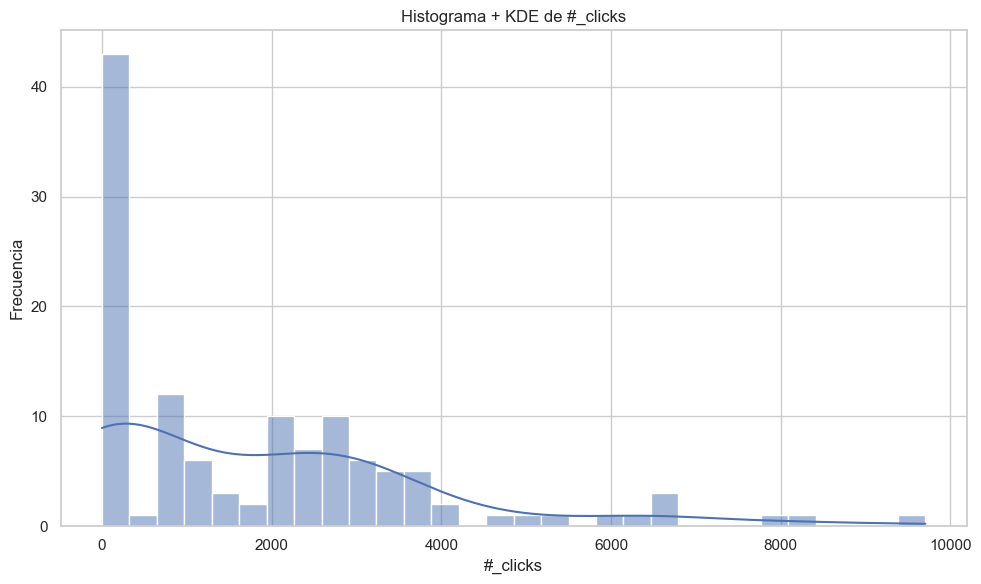

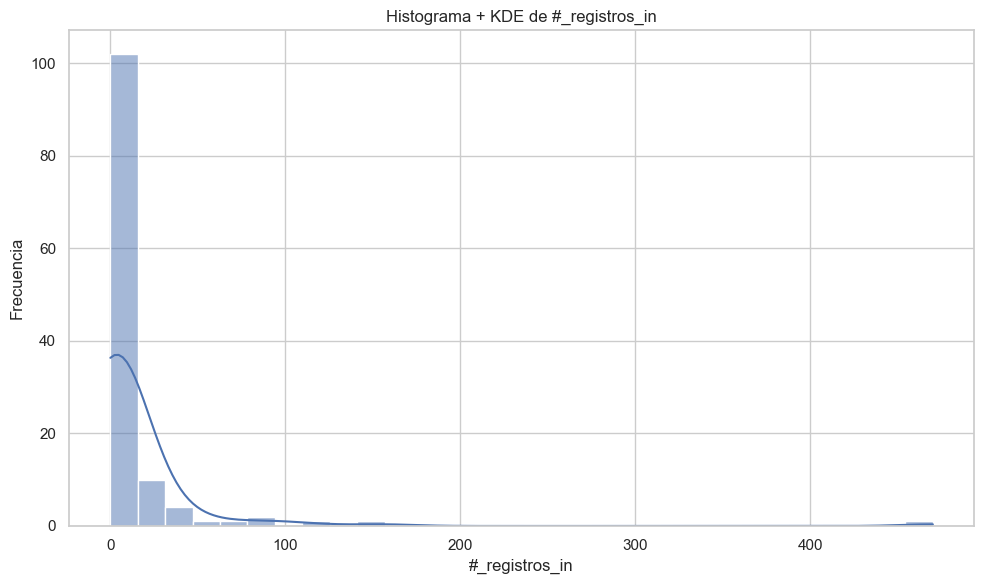

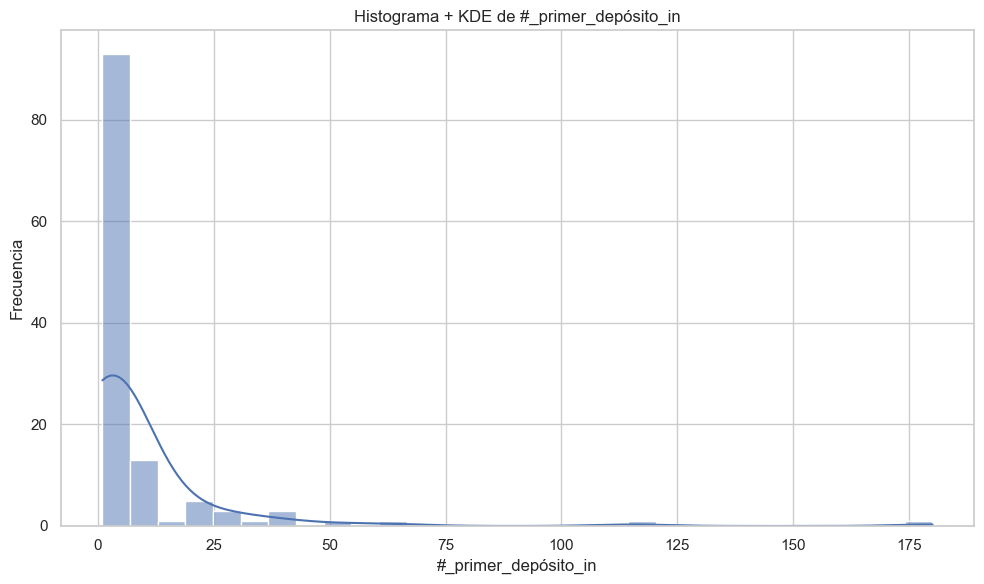

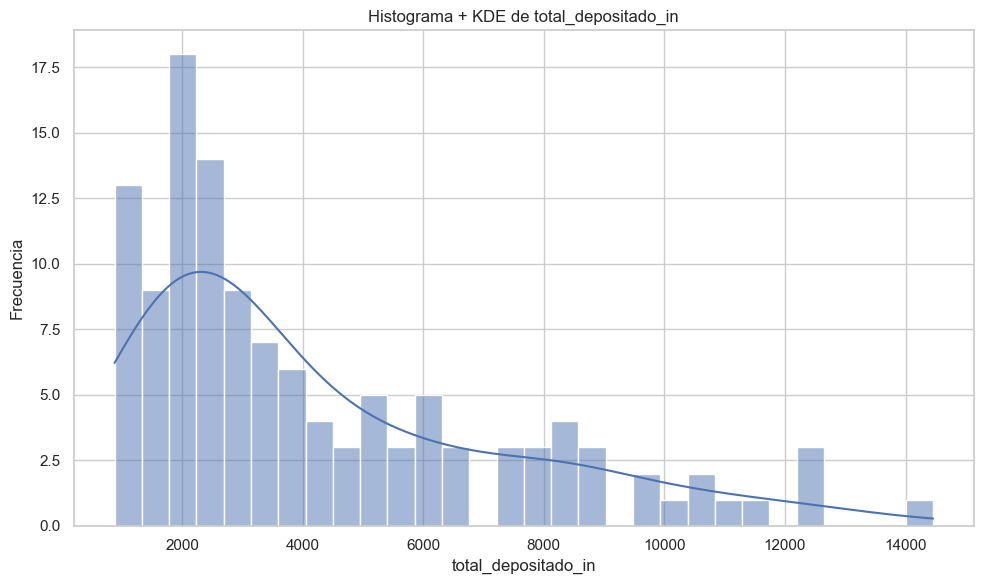

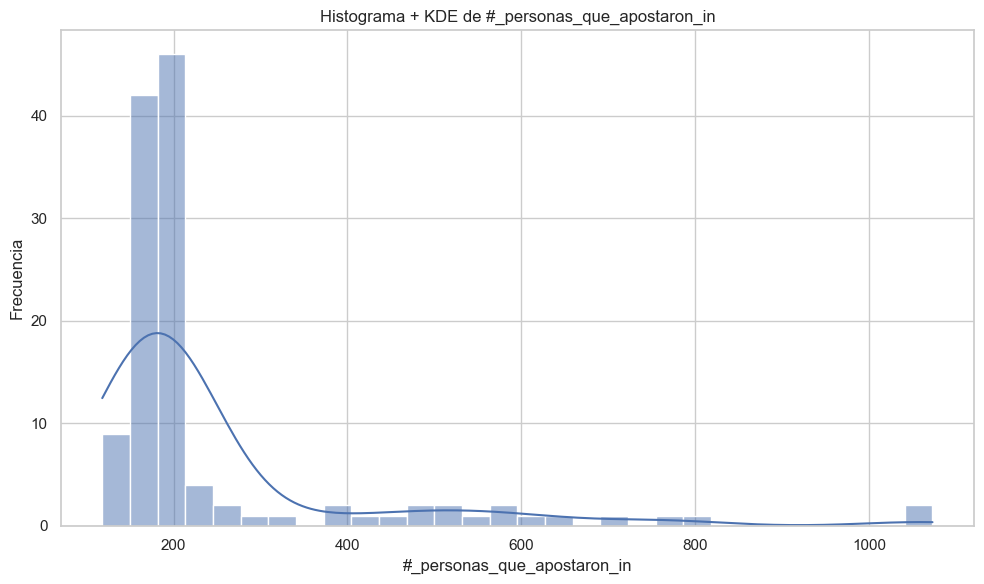

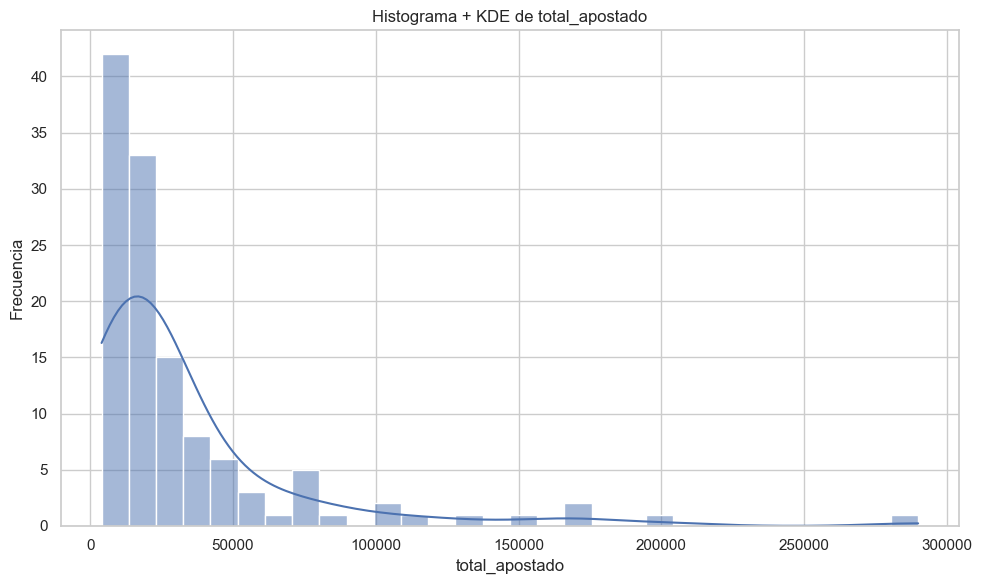

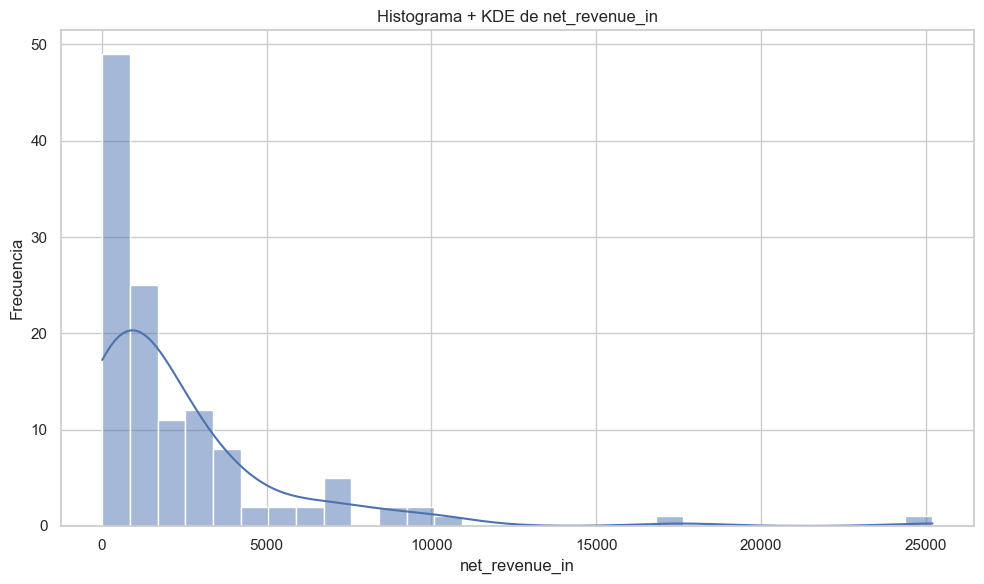

In [20]:
# Visualización de histogramas + KDE (forma de la distribución)
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_actividad[col], kde=True, bins=30)
    plt.title(f'Histograma + KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

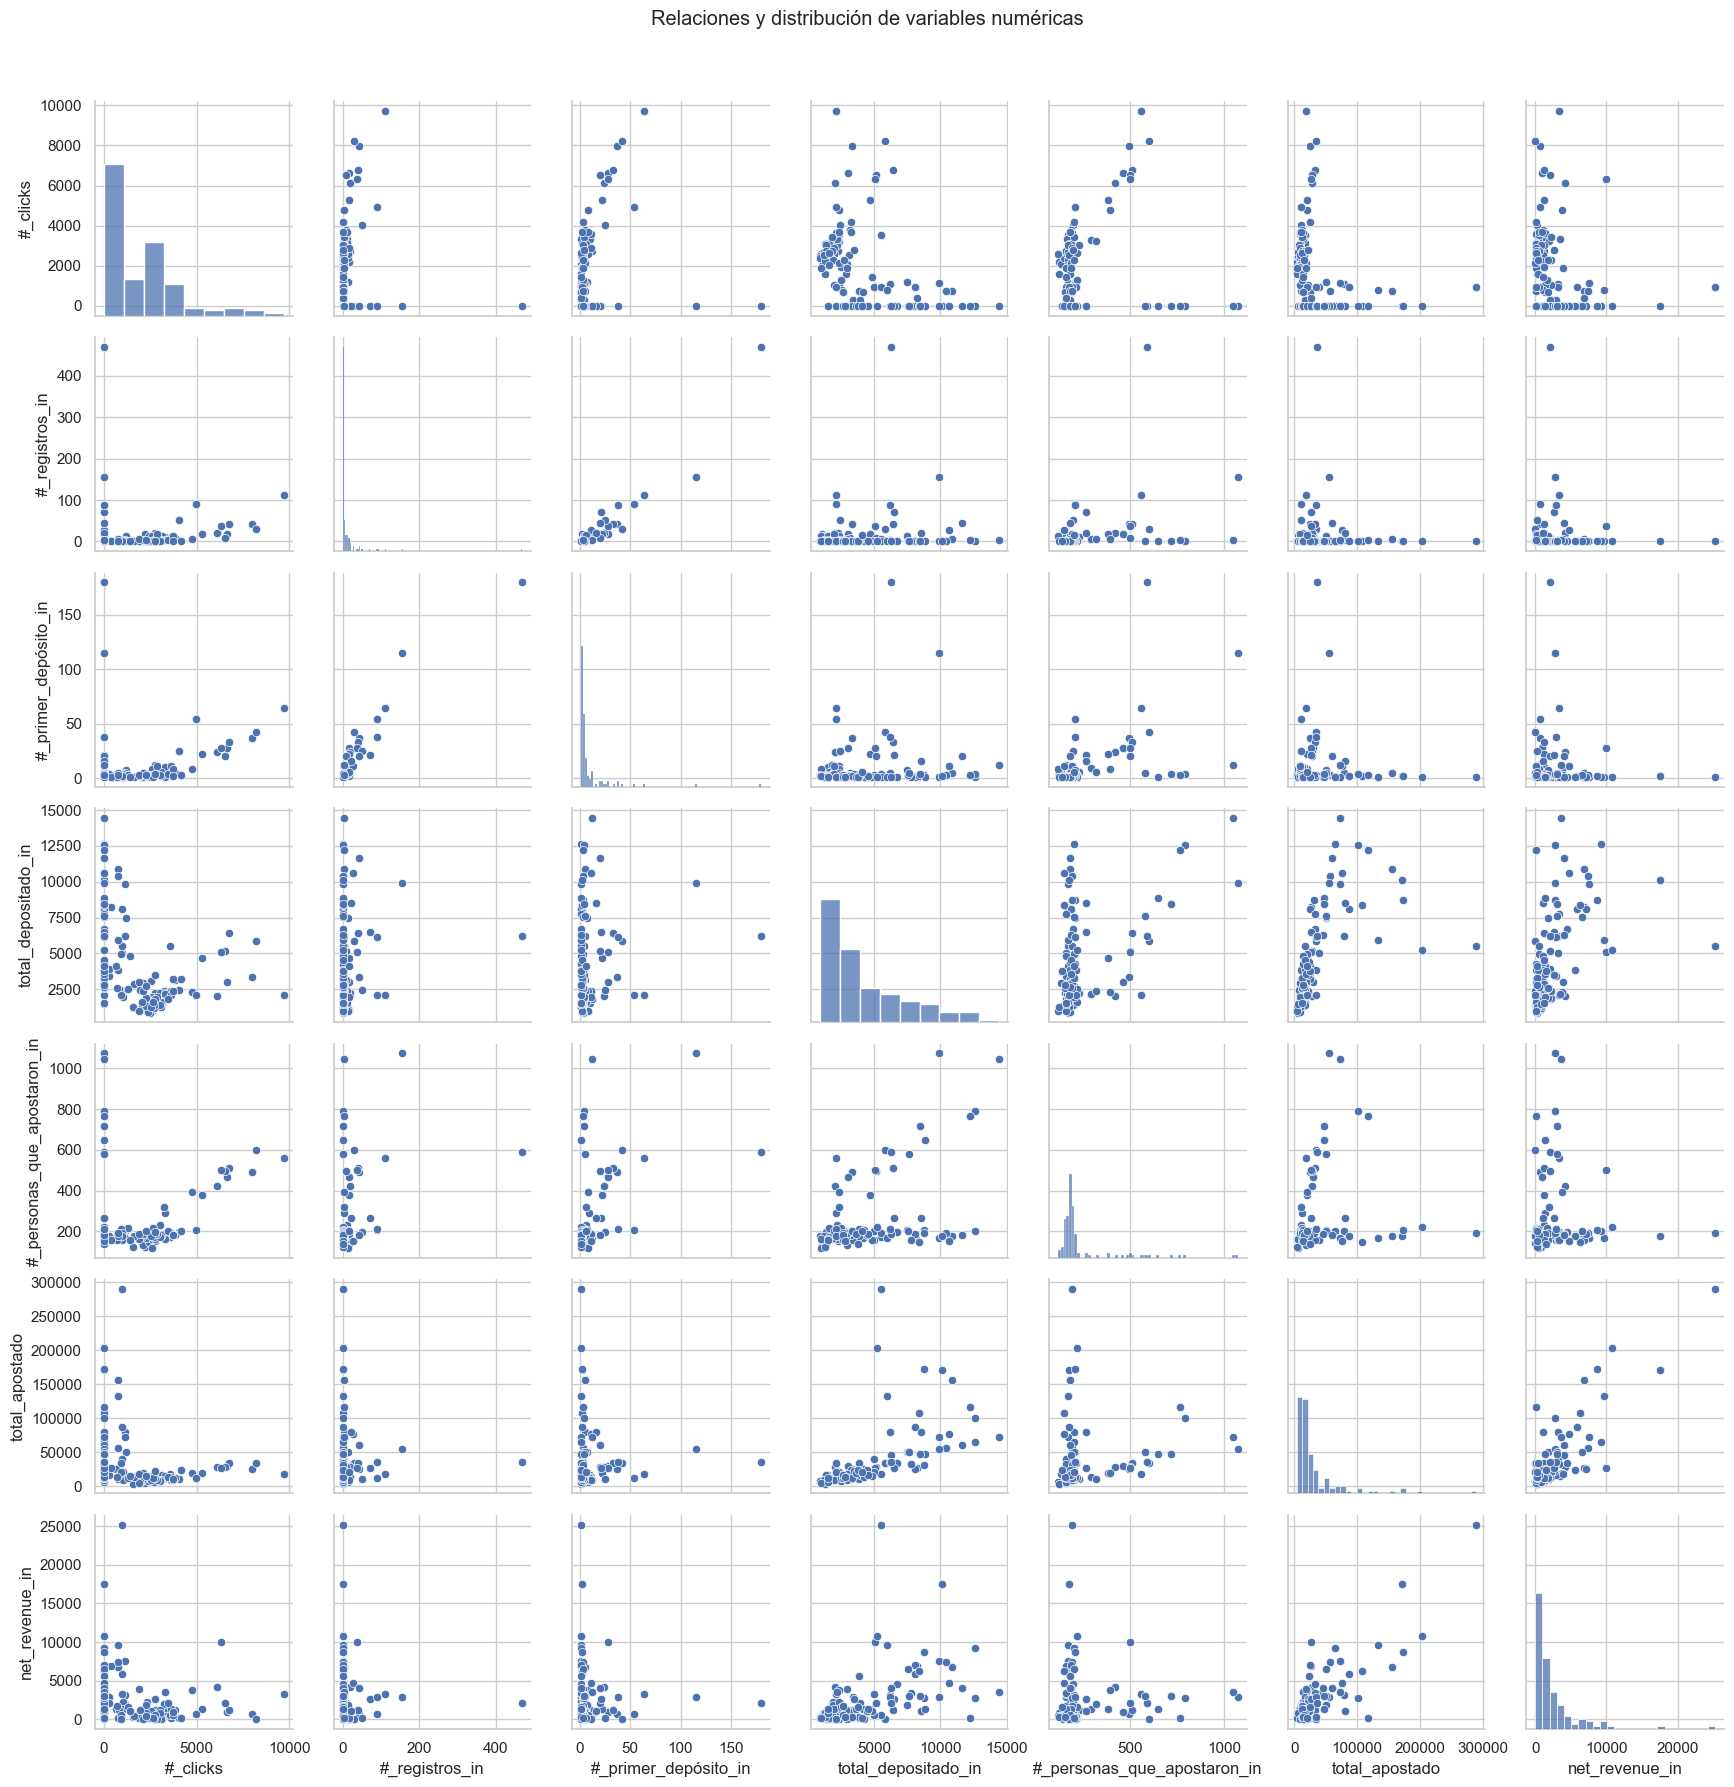

In [21]:
# Visualización conjunta
plt.figure(figsize=(10, 6))
sns.pairplot(df_actividad[columnas_numericas])
plt.suptitle('Relaciones y distribución de variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

In [22]:
# Creamos una funcion para detección de outliers
def detectar_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Bucle for para identificar outliers por columnas numericas
for col in columnas_numericas:
        outliers = detectar_outliers_iqr(df_actividad, col)
        print(f'🔍 Total outliers en {col}: {len(outliers)}')


🔍 Total outliers en #_clicks: 3
🔍 Total outliers en #_registros_in: 13
🔍 Total outliers en #_primer_depósito_in: 17
🔍 Total outliers en total_depositado_in: 4
🔍 Total outliers en #_personas_que_apostaron_in: 22
🔍 Total outliers en total_apostado: 15
🔍 Total outliers en net_revenue_in: 12


In [23]:
# Verficamos el tamaño de nuestro data_frame 
df_actividad.shape

(123, 12)

### **Recomendación para este analisis y proyección:**

#### Dado que:

- Tenemos pocos datos (123 filas).

    - Los outliers no representan más del 18% por variable.

    - Estamos preparando los datos para una proyección/modelado.

#### Mi recomendación es aplicar Winsorization para mantener los datos sin eliminarlos ni transformar su escala.
#### Sin embargo, si al modelar detectamos alta multicolinealidad o que la distribución sesgada afecta al modelo, podemos complementar con log-transform en esas columnas específicas.

In [24]:
# Función para aplicar Winsorization (capping)
def aplicar_winsorization(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower = df[column].quantile(lower_quantile)
    upper = df[column].quantile(upper_quantile)
    df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# Aplicar winsorization a todas las columnas numéricas con outliers
for col in columnas_numericas:
    df_actividad = aplicar_winsorization(df_actividad, col)

print("✅ Winsorization aplicada exitosamente.")

✅ Winsorization aplicada exitosamente.


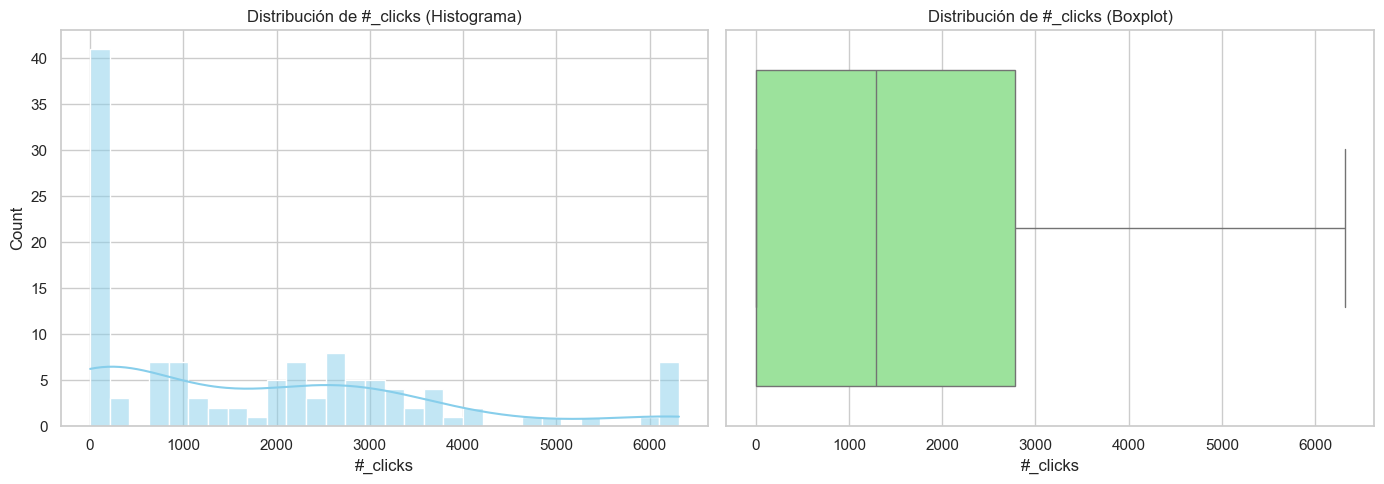

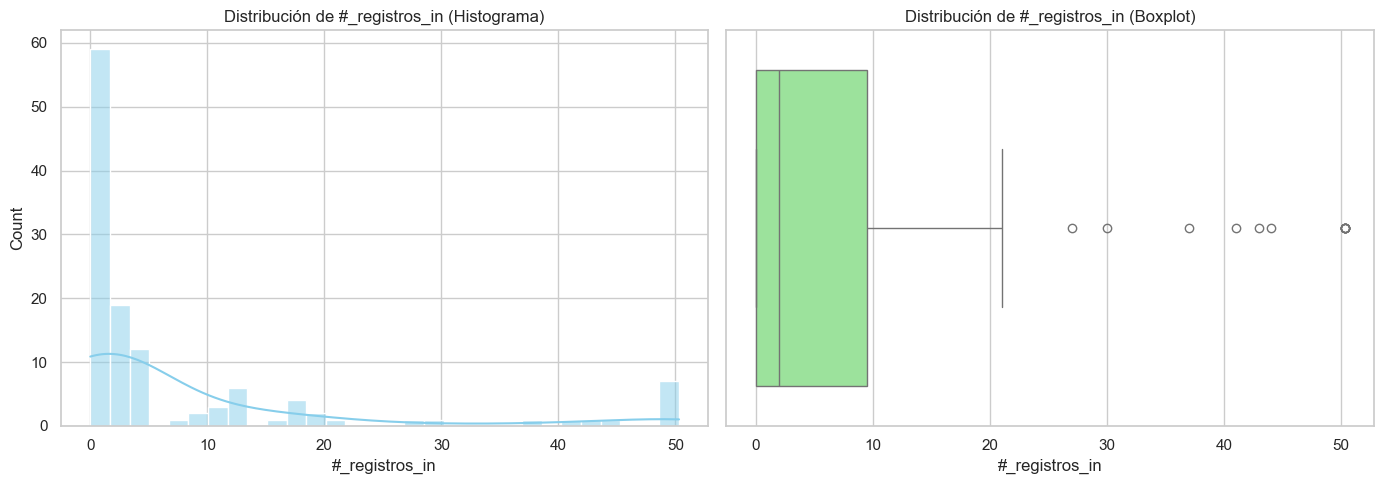

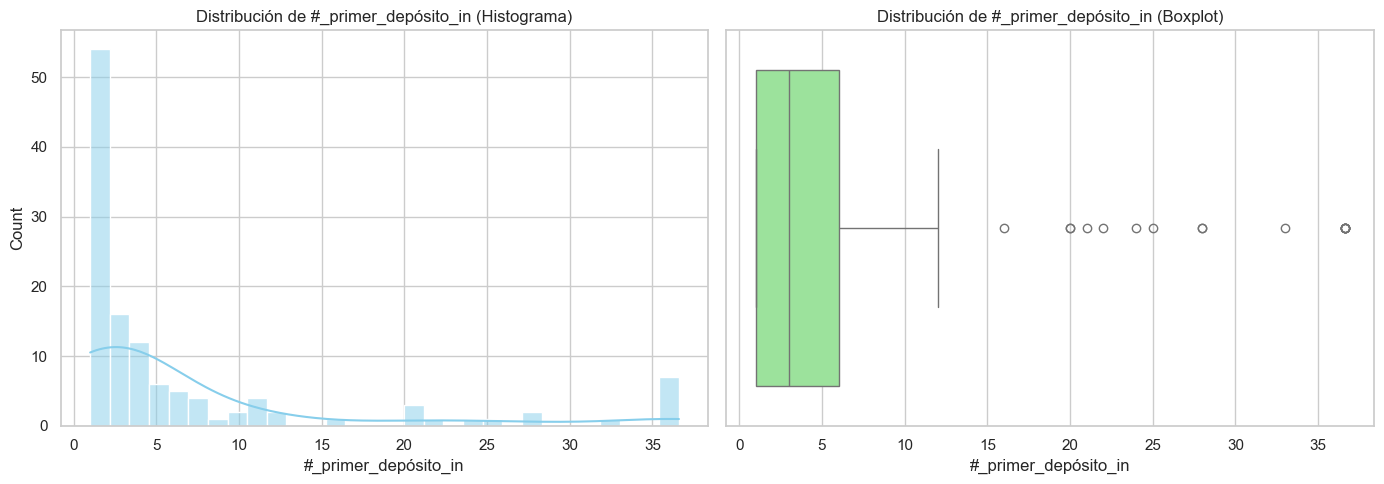

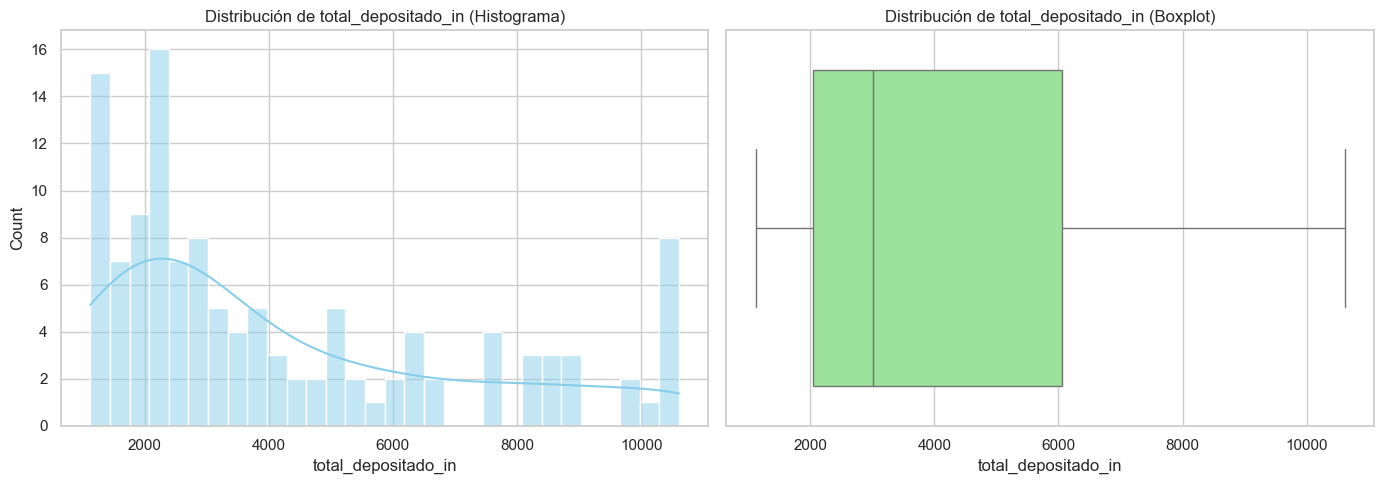

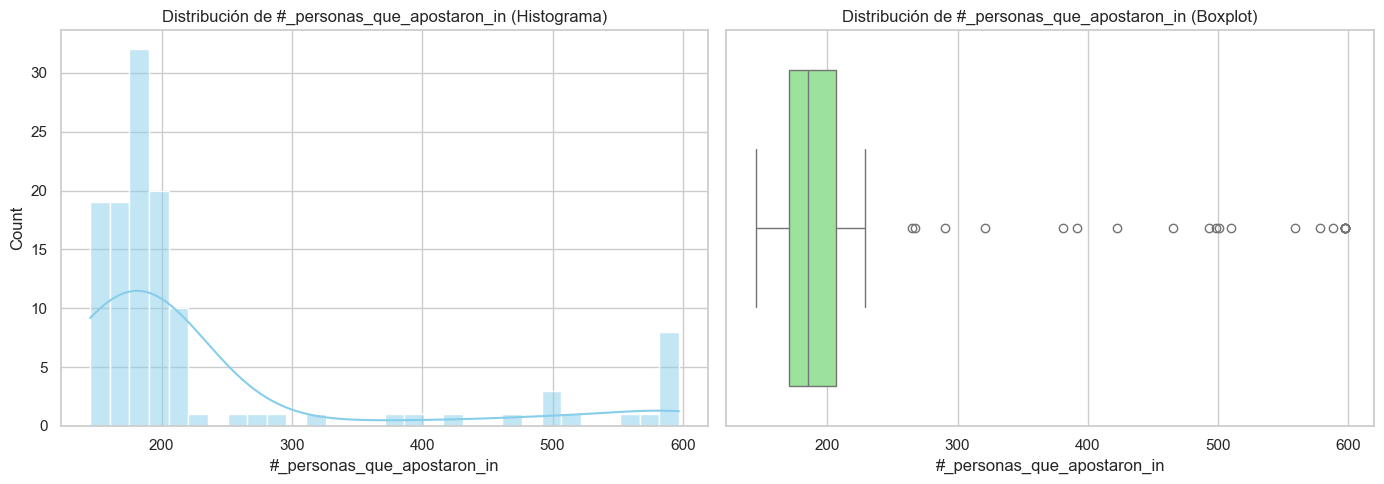

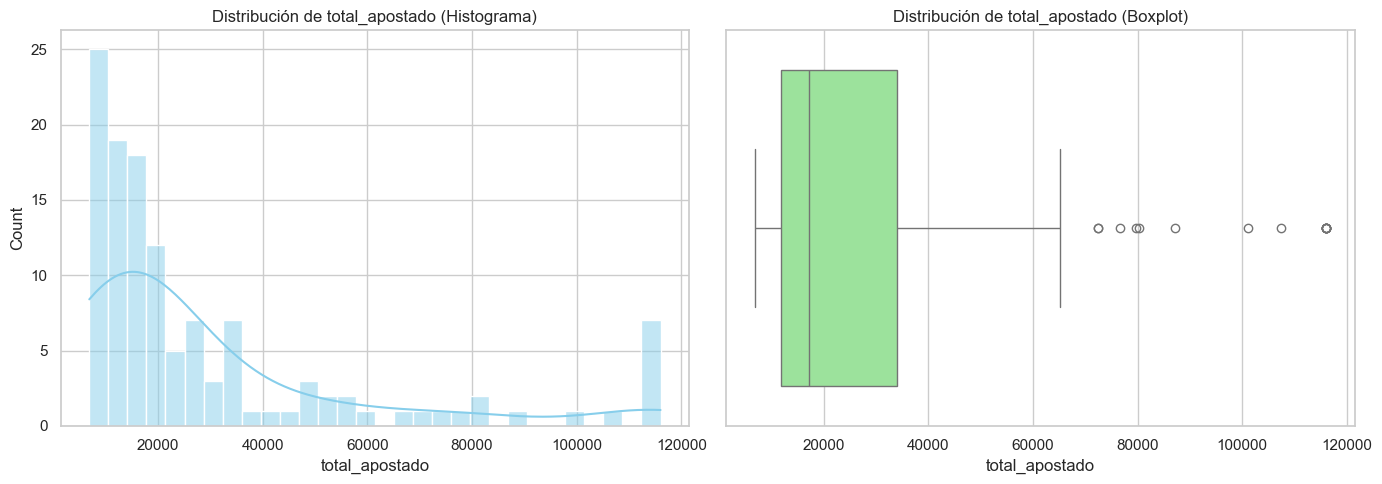

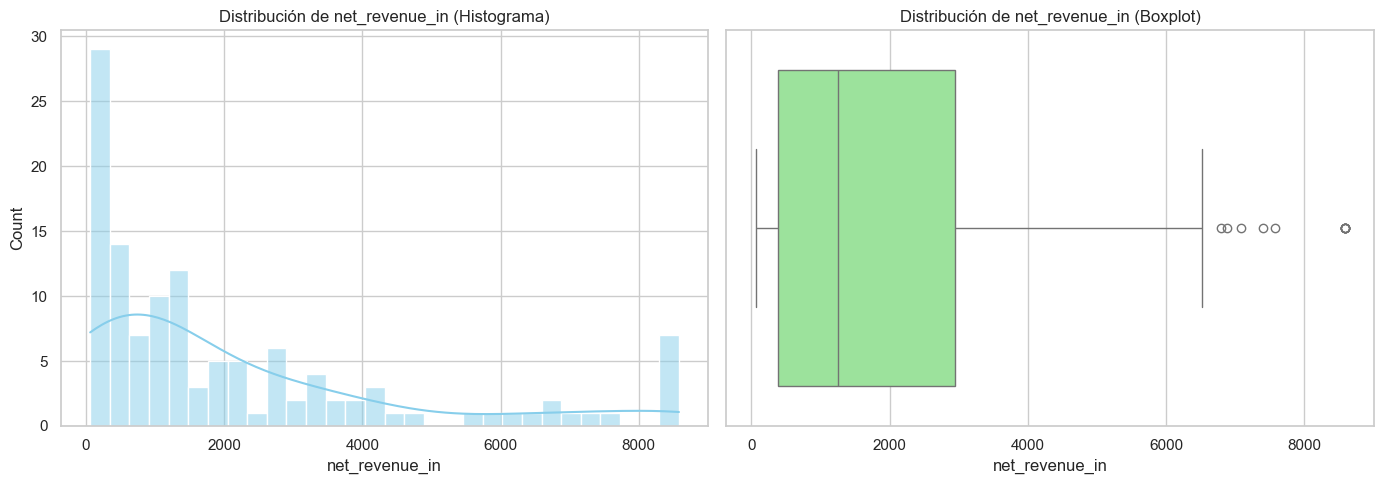

In [25]:
# Visualizar distribuciones después de aplicar Winsorization (capping)
for col in columnas_numericas:
    plt.figure(figsize=(14, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_actividad[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribución de {col} (Histograma)')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_actividad[col], color='lightgreen')
    plt.title(f'Distribución de {col} (Boxplot)')

    plt.tight_layout()
    plt.show()

In [26]:
# Guardamos dataset limpio y preparado para Power BI
df_actividad.to_csv("assetment_bookmaker_ready.csv", index=False)
df_actividad.to_excel("assetment_bookmaker_ready.xlsx", index=False)
df_actividad.head(15)


,periodo,#_clicks,#_registros_in,#_primer_depósito_in,total_depositado_in,#_personas_que_apostaron_in,total_apostado,net_revenue_in,año_mes,conversion_rate,avg_deposit_per_user,revenue_per_deposit
0,2022-11-25,6315.4,50.3,36.6,2093.406886,559.0,18538.051988,3308.869547,2022-11,0.011540,3.744914,1.580615
1,2022-11-27,6315.4,43.0,36.6,3343.945184,493.0,25492.039465,716.959308,2022-11,0.005388,6.782850,0.214405
2,2022-11-28,6315.4,30.0,36.6,5848.122926,597.0,34299.098726,62.740487,2022-11,0.003651,9.779470,0.001287
3,2022-11-30,6315.4,17.0,28.0,3008.933024,465.0,29197.093280,965.427480,2022-11,0.002558,6.470824,0.320854
4,2022-12-01,6103.0,20.0,24.0,2007.409539,422.0,27792.257545,4149.775367,2022-12,0.003277,4.756895,2.067229
5,2022-12-02,6315.4,41.0,33.0,6426.183158,510.0,33717.969304,1239.065467,2022-12,0.006067,12.600359,0.192815
6,2022-12-03,5270.0,18.0,22.0,4666.357108,381.0,19612.879284,1305.307930,2022-12,0.003416,12.247656,0.279727
7,2022-12-05,6315.4,8.0,20.0,5158.711728,498.0,28727.573870,2048.513217,2022-12,0.001229,10.358859,0.397098
8,2022-12-06,4758.0,5.0,8.0,2345.092439,392.0,19781.233198,3772.250507,2022-12,0.001051,5.982379,1.608572
9,2022-12-07,2789.0,3.0,10.0,1529.178199,166.0,16173.022243,616.097778,2022-12,0.001076,9.211917,0.402895


## **Proyección de Ingresos Netos (net_revenue_in)**

- Tareas
    - Elegir un modelo de proyección.
    - Explicar por qué lo elegiste.
    - Proyectar el ingreso neto para los próximos 2 años.
    - Validar el modelo con datos históricos (cross-validation, etc.).
    - Reflejar tendencias reales del negocio (precisión y fiabilidad).    

#### **Modelo Holt-Winters (Holt o Exponential Smoothing):**
#### Justificación del modelo:

Para proyectar los ingresos netos (Net Revenue IN) de los próximos 24 meses, se ha utilizado el modelo Holt, parte de la familia de Holt-Winters Exponential Smoothing, en su versión sin estacionalidad.

Este modelo fue seleccionado debido a:

- La escasa cantidad de datos disponibles (solo 11 puntos).
- La capacidad del modelo Holt para capturar tendencias lineales suaves en series cortas.
- Su robustez frente al sobreajuste y fácil interpretación para negocio.

#### **Preparación del entorno de datos**

In [27]:
# Preparación del entorno datos
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error

# Cargar el archivo
df_proyeccion = pd.read_csv("assetment_bookmaker_ready.csv", parse_dates=["periodo"])

# Suponiendo que la columna de fechas es 'Fecha' y la variable objetivo es 'Net revenue IN'
df_proyeccion['periodo'] = pd.to_datetime(df_proyeccion['periodo'])
df_proyeccion = df_proyeccion.sort_values('periodo')
df_proyeccion.set_index('periodo', inplace=True)

# Serie temporal de Net Revenue IN
y = df_proyeccion['net_revenue_in'].dropna()


#### **Visualización Inicial**

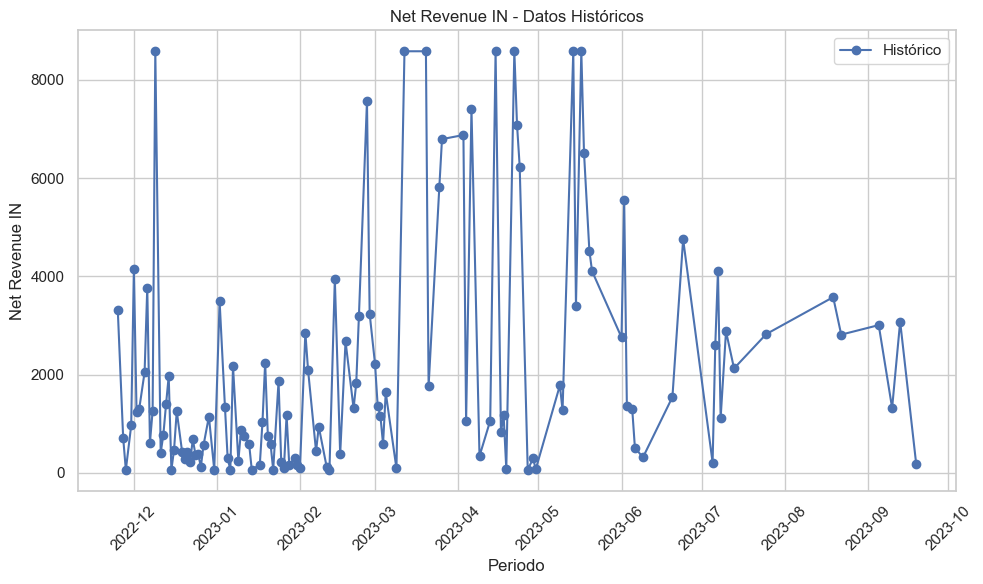

In [28]:
# Visualización inicial
plt.figure(figsize=(10, 6))
plt.plot(y, marker='o', label='Histórico')
plt.title('Net Revenue IN - Datos Históricos')
plt.xlabel('Periodo')
plt.ylabel('Net Revenue IN')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Interpretación del Gráfico Histórico**
#### 1. Patrón observado en la serie:
- La serie presenta alta **volatilidad**. Hay picos muy marcados y caídas abruptas que pueden indicar eventos puntuales o campañas específicas con impacto financiero fuerte.
- No se observa una **tendencia clara ascendente o descendente**, pero sí hay ciertos periodos donde los valores se estabilizan, especialmente a partir de julio de 2023, donde los valores tienden a mantenerse en un rango entre 1,000 y 4,000.

#### 2. Estacionalidad:
- Con solo 11 meses de datos no es posible confirmar un patrón estacional robusto. La **irregularidad en los picos** sugiere que aún no se puede aplicar un modelo que requiera estacionalidad (como el completo Holt-Winters).
- Esta es precisamente una de las razones por las que elegimos el **modelo Holt (sin estacionalidad)**.

#### 3. Outliers / Picos extremos:
- Se observan valores extremos, por ejemplo en diciembre de 2022, marzo y abril de 2023, donde los ingresos netos superan los **8,000.**
- Esto podría corresponder a eventos específicos (como apuestas deportivas de alto volumen, promociones, o picos estacionales como finales de torneos), pero sin datos adicionales, es difícil atribuir causas exactas.

#### 4. Densidad de datos:
- Parece que los datos están agregados a **nivel diario**, pero con muchos días sin datos, lo cual puede generar **saltos en la línea**.
- Esto puede hacer que los métodos de suavizado (como Holt) funcionen mejor que otros modelos más sensibles a irregularidades o huecos temporales.

#### **Recomendación**
Dado el comportamiento altamente irregular de la serie y la falta de estacionalidad evidente, el modelo Holt es una opción óptima. Nos permitirá capturar la tendencia subyacente sin sobreajustarse a los picos. Además, se adapta bien a series pequeñas como esta (menos de 12 meses). Por ultimo vamos a afinar la serie a datos mensuales para reducir la volatilidad diaria y lo huecos para nuestra proyeccion para los proximos 24 meses (2 años).

#### **Visualizacion Inicial Mensual**

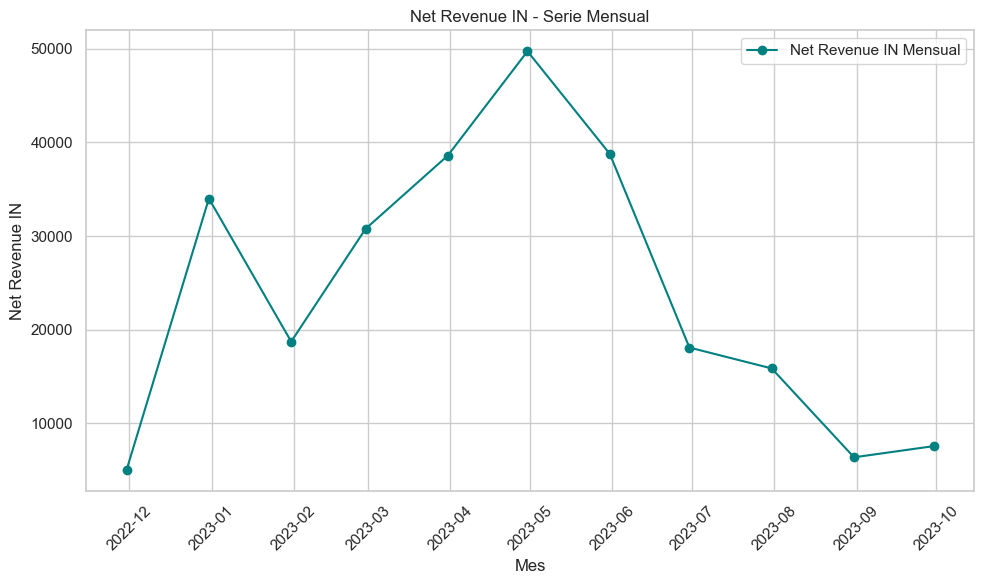

In [29]:
# Agrupar la serie por mes y sumar los valores de cada mes
y_mensual = df_proyeccion['net_revenue_in'].dropna().resample('ME').sum()

# Visualizar la serie mensual
plt.figure(figsize=(10, 6))
plt.plot(y_mensual, marker='o', color='teal', label='Net Revenue IN Mensual')
plt.title('Net Revenue IN - Serie Mensual')
plt.xlabel('Mes')
plt.ylabel('Net Revenue IN')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Aplicar el modelo Holt**

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


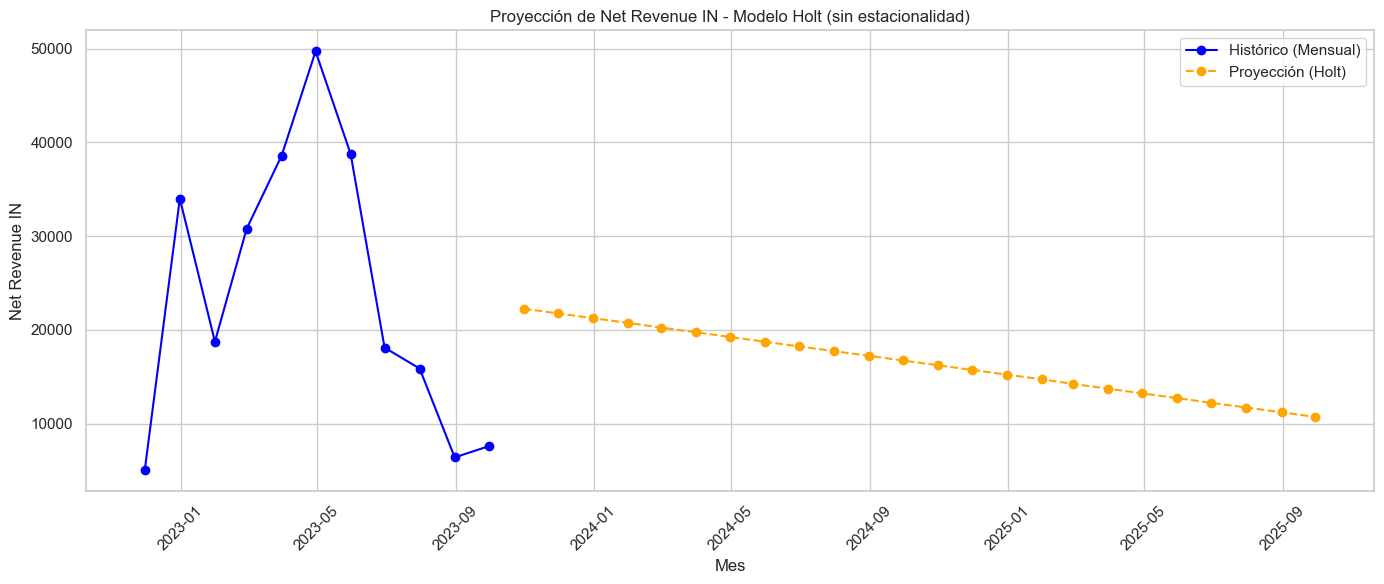

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Modelo de Holt: nivel + tendencia
modelo_holt = ExponentialSmoothing(
    y_mensual,
    trend="add",
    initialization_method="estimated"  # Estimación automática del nivel inicial y tendencia
).fit()

# Proyección a 12 o 24 meses
proyeccion_holt = modelo_holt.forecast(24)

# Gráfico
plt.figure(figsize=(14,6))
plt.plot(y_mensual, marker='o', label='Histórico (Mensual)', color='blue')
plt.plot(proyeccion_holt, marker='o', linestyle='--', color='orange', label='Proyección (Holt)')
plt.title('Proyección de Net Revenue IN - Modelo Holt (sin estacionalidad)')
plt.xlabel('Mes')
plt.ylabel('Net Revenue IN')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Evaluación visual del modelo (gráfico)**
#### Observaciones:
- El modelo proyecta una tendencia decreciente constante en la serie.
- El histórico muestra un patrón bastante volátil y no claramente lineal, con un pico pronunciado en el primer semestre de 2023 y una caída posterior.
- No se aprecia estacionalidad clara (ademas solo 11 observaciones), por lo tanto, tiene sentido usar el modelo Holt sin componente estacional.


#### **Errores y precisión del modelo**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Predicción dentro del histórico
ajuste_holt = modelo_holt.fittedvalues

# Errores
mae = mean_absolute_error(y_mensual, ajuste_holt)
mse = mean_squared_error(y_mensual, ajuste_holt)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_mensual, ajuste_holt) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

MAE  : 12729.15
RMSE : 14247.36
MAPE : 109.19%


#### **Analisis de residuos**

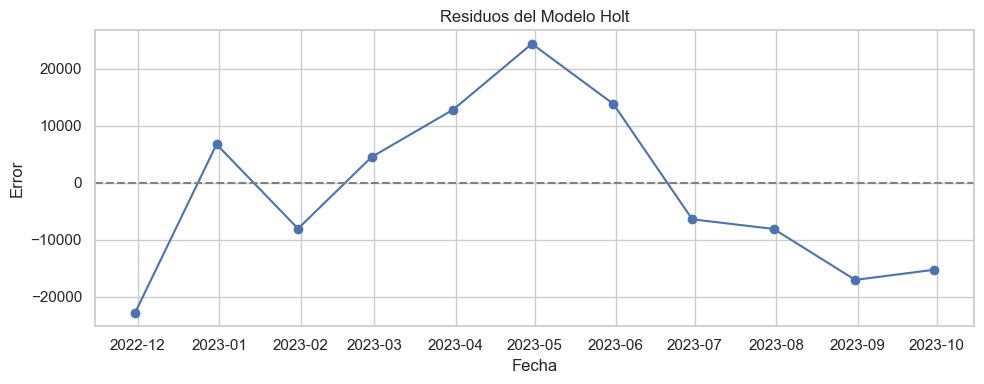

In [32]:
residuos = y_mensual - ajuste_holt

plt.figure(figsize=(10, 4))
plt.plot(residuos, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuos del Modelo Holt')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Modelo Holt con logaritmo + proyección 24 meses**

MAE  : 17079.64
RMSE : 27089.80
MAPE : 124.72%


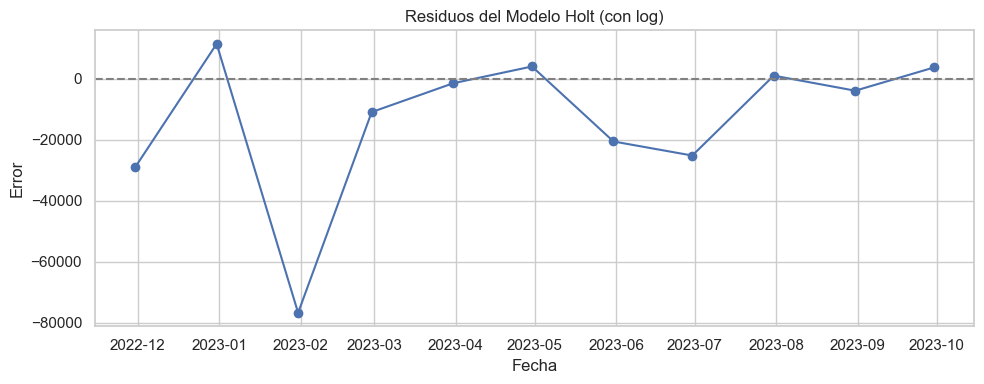

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1976\773778502.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=y_mensual.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


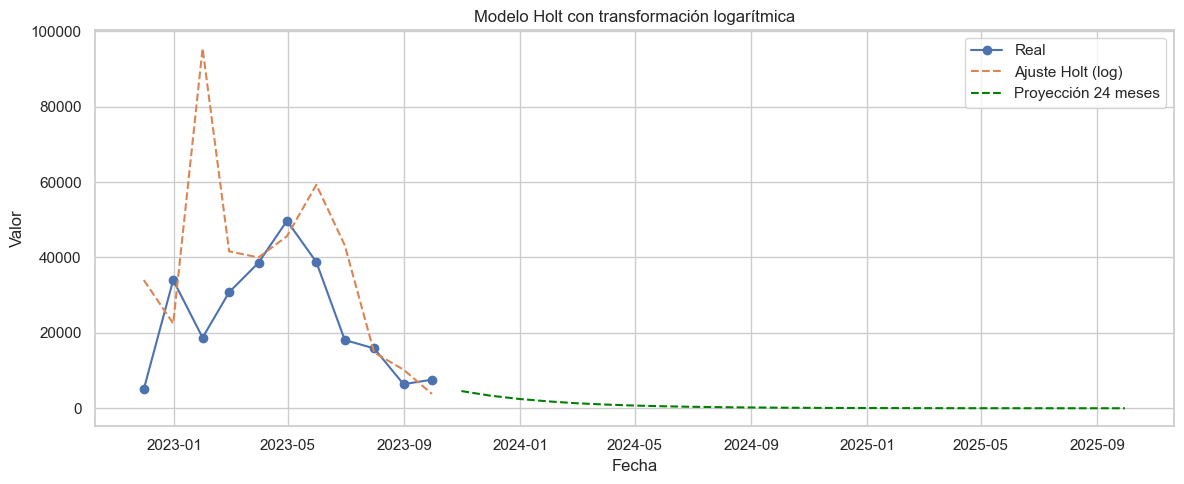

In [33]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Aplicar logaritmo
y_log = np.log(y_mensual)

# 2. Ajustar modelo Holt en escala log
modelo_holt_log = Holt(y_log).fit()
ajuste_log = modelo_holt_log.fittedvalues

# 3. Exponenciar ajuste para volver al espacio original
ajuste_back = np.exp(ajuste_log)

# 4. Proyección a 24 meses en espacio log
forecast_log = modelo_holt_log.forecast(24)
forecast_back = np.exp(forecast_log)

# 5. Métricas de error dentro del histórico
mae = mean_absolute_error(y_mensual, ajuste_back)
rmse = np.sqrt(mean_squared_error(y_mensual, ajuste_back))
mape = mean_absolute_percentage_error(y_mensual, ajuste_back) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# 6. Calcular residuos
residuos = y_mensual - ajuste_back

# 7. Graficar residuos
plt.figure(figsize=(10, 4))
plt.plot(residuos, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuos del Modelo Holt (con log)')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Combinar histórico + forecast
# Asegurar que y_mensual tenga índice de tipo datetime
if not isinstance(y_mensual.index, pd.DatetimeIndex):
    y_mensual.index = pd.date_range(start='2022-12-01', periods=len(y_mensual), freq='M')

forecast_index = pd.date_range(start=y_mensual.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_series = pd.Series(forecast_back, index=forecast_index)

# 9. Gráfico final: real + ajuste + proyección
plt.figure(figsize=(12, 5))
plt.plot(y_mensual, label='Real', marker='o')
plt.plot(ajuste_back, label='Ajuste Holt (log)', linestyle='--')
plt.plot(forecast_series, label='Proyección 24 meses', linestyle='dashed', color='green')
plt.title('Modelo Holt con transformación logarítmica')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#### **Modelo Holt con Rolling Mean + proyección 24 meses**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1976\1522437916.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_suavizado = y_suavizado.fillna(method='bfill').fillna(method='ffill')


MAE  : 6241.51
RMSE : 7949.28
MAPE : 49.52%


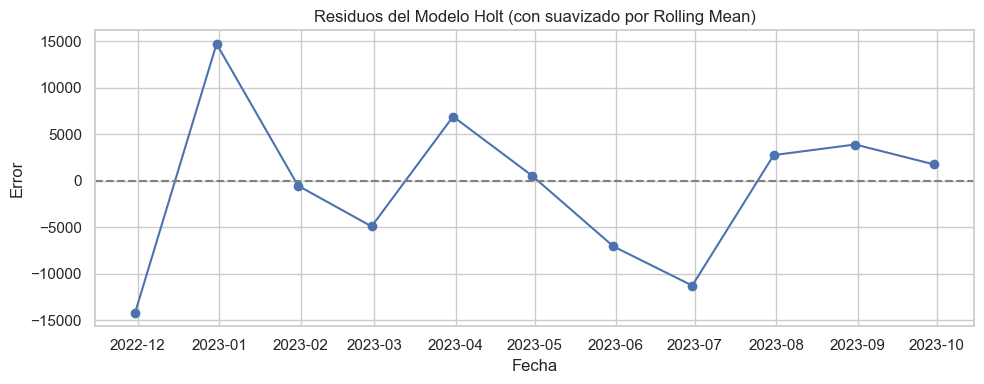

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1976\1522437916.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=y_mensual.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


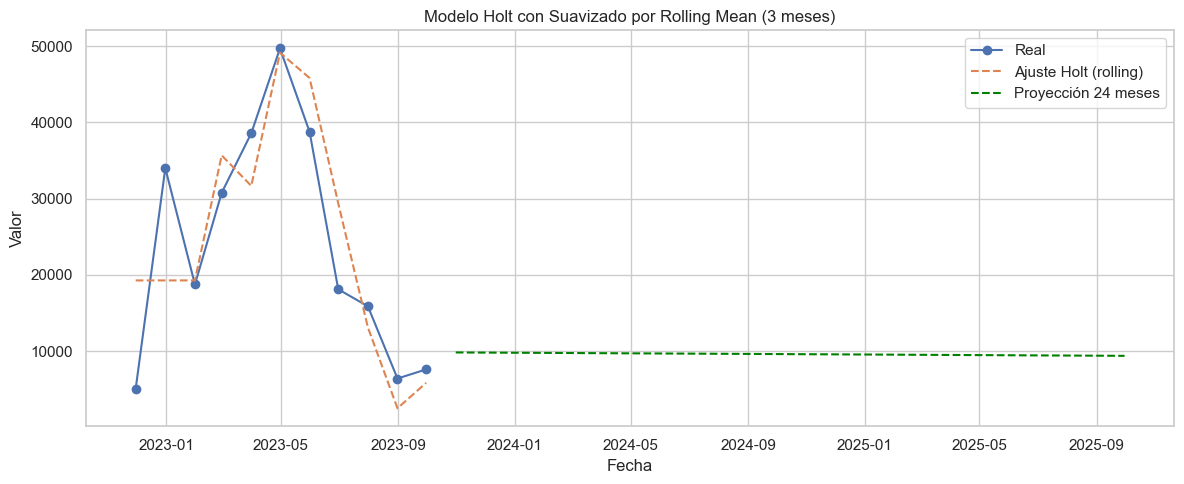

In [34]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Suavizar la serie original con media móvil (ventana de 3)
y_suavizado = y_mensual.rolling(window=3, center=True).mean()

# Como rolling genera NaNs al inicio y final, los rellenamos si es necesario
y_suavizado = y_suavizado.fillna(method='bfill').fillna(method='ffill')

# 2. Ajustar el modelo Holt sobre la serie suavizada
modelo_holt_suav = Holt(y_suavizado).fit()
ajuste_holt_suav = modelo_holt_suav.fittedvalues

# 3. Proyección a 24 meses
forecast_holt_suav = modelo_holt_suav.forecast(24)

# 4. Métricas de error respecto a la serie original
mae = mean_absolute_error(y_mensual, ajuste_holt_suav)
rmse = np.sqrt(mean_squared_error(y_mensual, ajuste_holt_suav))
mape = mean_absolute_percentage_error(y_mensual, ajuste_holt_suav) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# 5. Calcular residuos
residuos = y_mensual - ajuste_holt_suav

# 6. Graficar residuos
plt.figure(figsize=(10, 4))
plt.plot(residuos, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuos del Modelo Holt (con suavizado por Rolling Mean)')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Combinar histórico + forecast
if not isinstance(y_mensual.index, pd.DatetimeIndex):
    y_mensual.index = pd.date_range(start='2022-12-01', periods=len(y_mensual), freq='M')

forecast_index = pd.date_range(start=y_mensual.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_series = pd.Series(forecast_holt_suav.values, index=forecast_index)

# 8. Gráfico final: Real + Ajuste + Proyección
plt.figure(figsize=(12, 5))
plt.plot(y_mensual, label='Real', marker='o')
plt.plot(ajuste_holt_suav, label='Ajuste Holt (rolling)', linestyle='--')
plt.plot(forecast_series, label='Proyección 24 meses', linestyle='dashed', color='green')
plt.title('Modelo Holt con Suavizado por Rolling Mean (3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Modelo Seleccionado: Holt con Rolling Mean

Se evaluaron tres variantes de modelos de proyección sobre la serie `net_revenue_in` con solo 11 observaciones mensuales disponibles. 

| Modelo                          | MAE       | RMSE      | MAPE     |
|--------------------------------|-----------|-----------|----------|
| Holt (simple)                  | 12,729.15 | 14,247.36 | 109.19%  |
| Holt + Logaritmo               | 17,079.64 | 27,089.80 | 124.72%  |
| **Holt + Rolling Mean (3 meses)** | **6,241.51** | **7,949.28** | **49.52%** ✅ |

📌 **Motivo de selección**:
- El modelo con rolling mean de 3 meses reduce la volatilidad, suaviza la serie y mejora sustancialmente las métricas de error.
- Es robusto, interpretable y adecuado para series cortas (≤12 datos).
- Mejora la estabilidad del forecast, evitando sobreajuste y proyecciones poco realistas.

🔮 **Proyección**:
Se realizó la proyección de los próximos **24 meses** (2 años), generando una tabla de resultados lista para visualizarse en Power BI.

📤 Archivo exportado: `proyeccion_net_revenue_24_meses.csv`


#### **DataFrame con las proyecciones a 24 meses**

In [35]:
# Crear DataFrame con la proyección a 24 meses
df_forecast = pd.DataFrame({
    "periodo": forecast_series.index,
    "net_revenue_in_proyectado": forecast_series.values
})

# Ordenar por fecha
df_forecast.sort_values(by='periodo', inplace=True)

# Vista previa
df_forecast.to_csv("proyeccion_net_revenue_24_meses.csv", index=False)
df_forecast.to_excel("proyeccion_net_revenue_24_meses.xlsx", index=False)
df_forecast.head()

,periodo,net_revenue_in_proyectado
0,2023-10-31,9812.075255
1,2023-11-30,9792.679818
2,2023-12-31,9773.284380
3,2024-01-31,9753.888943
4,2024-02-29,9734.493505
